## 📂 Data Retrieval & Preparation

This section covers the initial data import, inspection, and basic cleaning steps applied to the **Health & Lifestyle Dataset**. The following actions were performed:

- ✅ Loaded the dataset file `health_activity_data.csv`.
- 🔍 Checked for duplicate values in the `ID` column.
- ⚠️ Identified and displayed missing (null) values in each column.
- 🔄 Converted categorical string variables to binary format, while preserving original labels:
  - `Gender` (Male → 0, Female → 1)
  - `Smoker`, `Diabetic`, `Heart_Disease` (No → 0, Yes → 1)
- 🩺 Split the `Blood_Pressure` column into two separate numeric columns:
  - `Systolic_BP` and `Diastolic_BP`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
df = pd.read_csv('/kaggle/input/health-and-lifestyle-dataset/health_activity_data.csv')

df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


In [3]:
duplicate_ids = df[df.duplicated(subset='ID')]
print(f"Number of duplicate IDs: {duplicate_ids.shape[0]}")

if not duplicate_ids.empty:
    display(duplicate_ids)

null_counts = df.isnull().sum()
print("\nNull values per column:")
print(null_counts[null_counts > 0])


Number of duplicate IDs: 0

Null values per column:
Series([], dtype: int64)


In [4]:
df['Gender_bin'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Smoker_bin'] = df['Smoker'].map({'No': 0, 'Yes': 1})
df['Diabetic_bin'] = df['Diabetic'].map({'No': 0, 'Yes': 1})
df['Heart_Disease_bin'] = df['Heart_Disease'].map({'No': 0, 'Yes': 1})

df[['Gender', 'Gender_bin', 'Smoker', 'Smoker_bin', 'Diabetic', 'Diabetic_bin', 'Heart_Disease', 'Heart_Disease_bin']].head()

,Gender,Gender_bin,Smoker,Smoker_bin,Diabetic,Diabetic_bin,Heart_Disease,Heart_Disease_bin
0,Male,0,No,0,No,0,No,0
1,Male,0,No,0,No,0,No,0
2,Female,1,Yes,1,No,0,No,0
3,Male,0,No,0,No,0,No,0
4,Male,0,Yes,1,No,0,No,0


In [5]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)
df[['Blood_Pressure', 'Systolic_BP', 'Diastolic_BP']].head()


,Blood_Pressure,Systolic_BP,Diastolic_BP
0,137/72,137,72
1,129/65,129,65
2,127/68,127,68
3,125/86,125,86
4,100/64,100,64


## 📊 Data Visualization

This section presents a visual overview of the demographic, lifestyle, and health-related variables in the dataset. The focus is placed on differences between genders, as well as basic behavioral trends.

- ✅ Displayed the absolute and percentage-based distribution of `Gender`.
- 📦 Visualized gender-specific distributions for numerical features using boxplots:
  - `Age`, `Height_cm`, `Weight_kg`, `BMI`
  - `Daily_Steps`, `Calories_Intake`, `Hours_of_Sleep`, `Heart_Rate`
  - `Exercise_Hours_per_Week`, `Alcohol_Consumption_per_Week`
  - `Systolic_BP`, `Diastolic_BP`
- 🧬 Visualized binary health indicators grouped by gender using count plots:
  - `Smoker_bin`, `Diabetic_bin`, `Heart_Disease_bin`
- 🔎 Plotted the age distribution based on smoking status using stacked histograms.


Gender distribution (absolute):
Gender
Male      523
Female    477
Name: count, dtype: int64

Gender distribution (%):
Gender
Male      52.3
Female    47.7
Name: proportion, dtype: float64


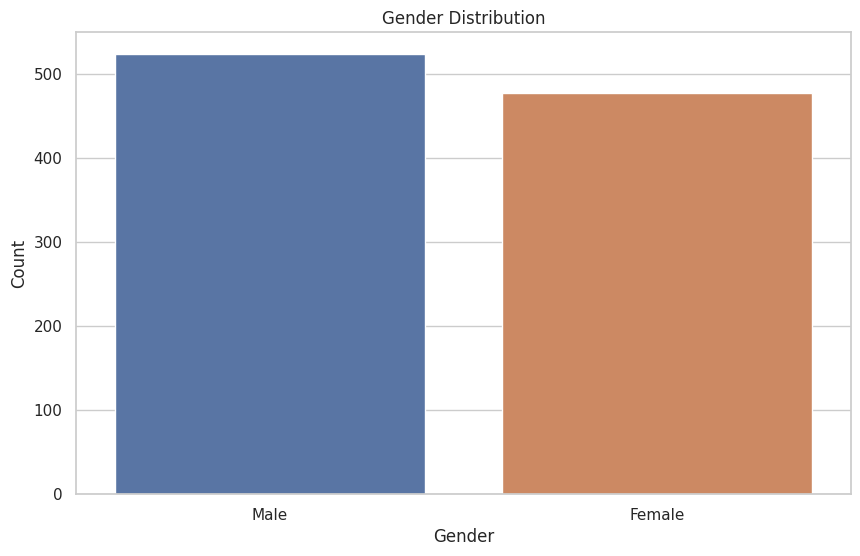

In [6]:
gender_counts = df['Gender'].value_counts()
gender_percent = df['Gender'].value_counts(normalize=True) * 100

print("Gender distribution (absolute):")
print(gender_counts)
print("\nGender distribution (%):")
print(gender_percent.round(2))

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


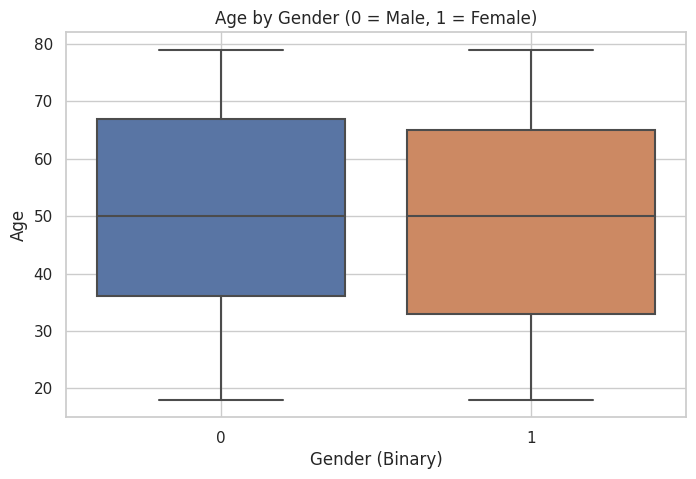

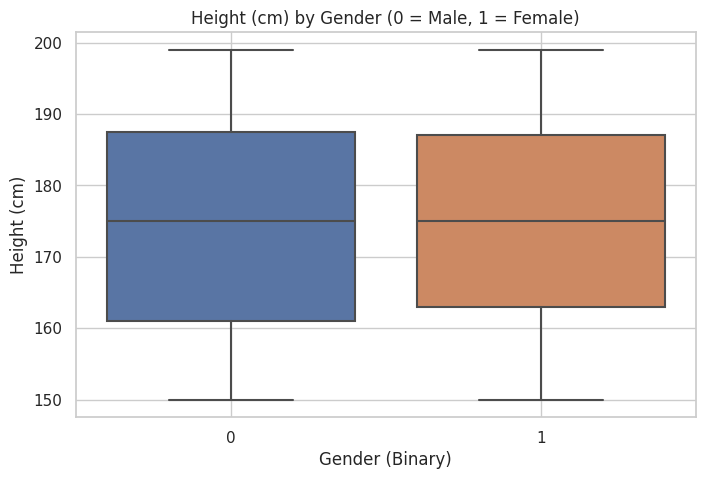

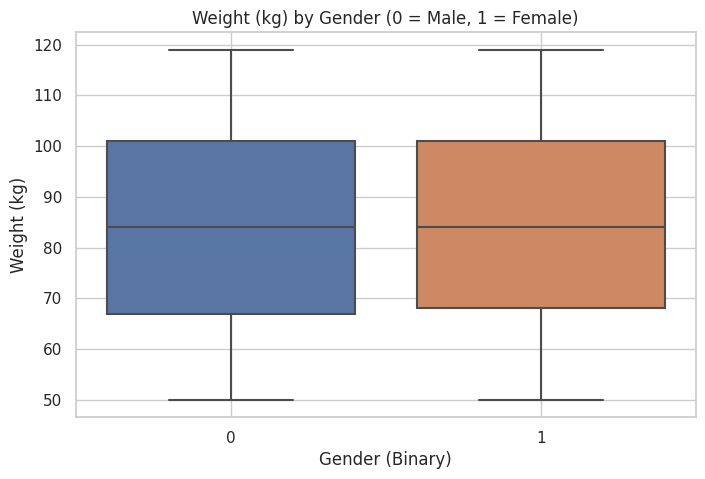

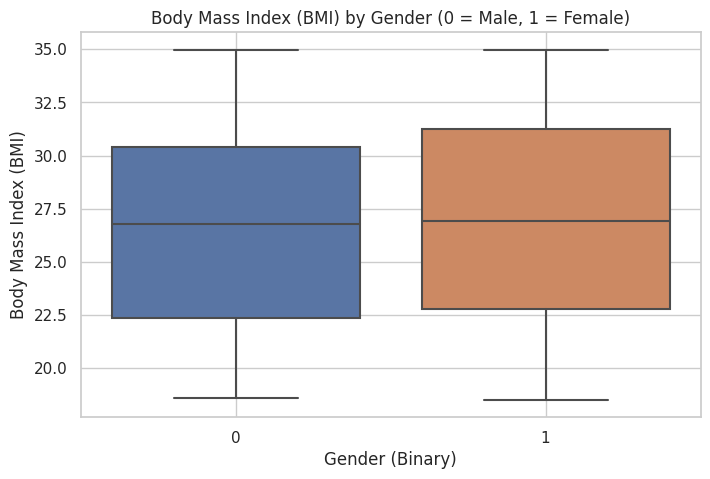

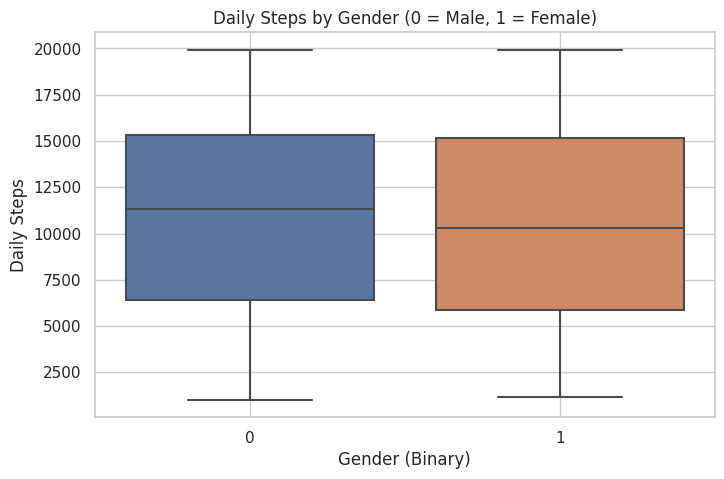

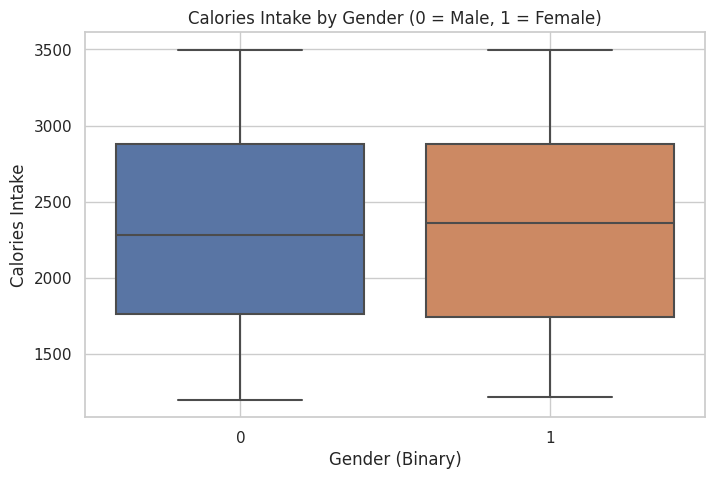

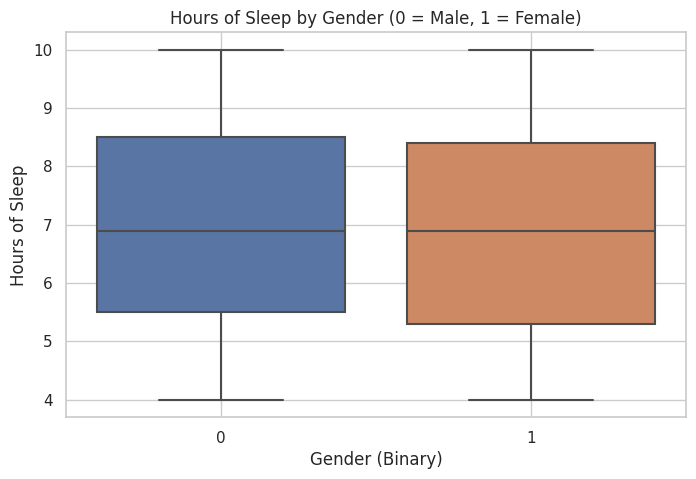

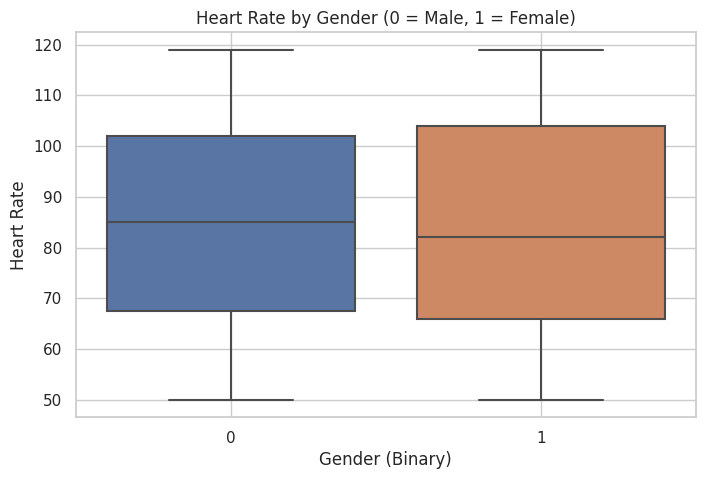

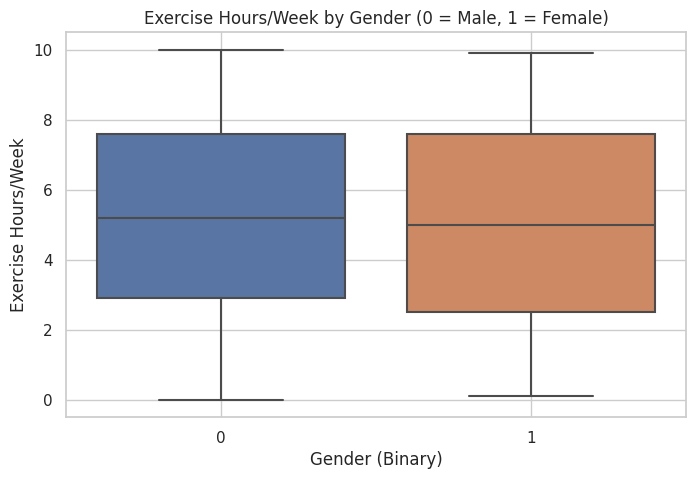

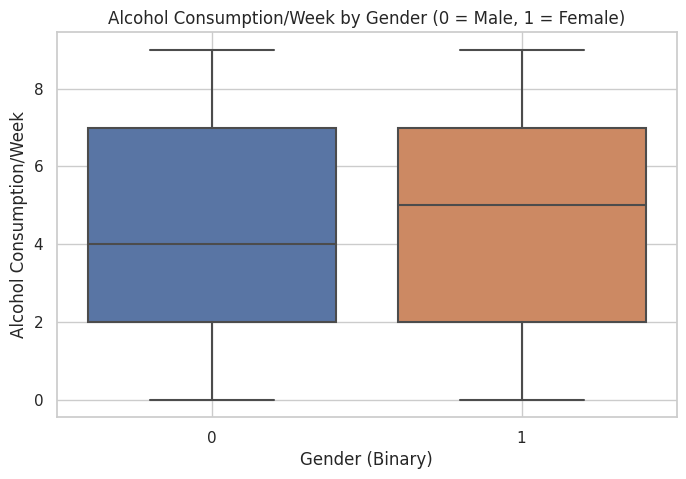

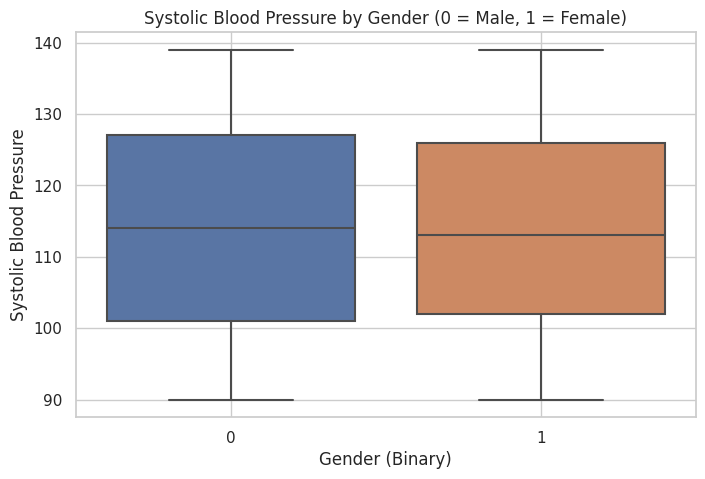

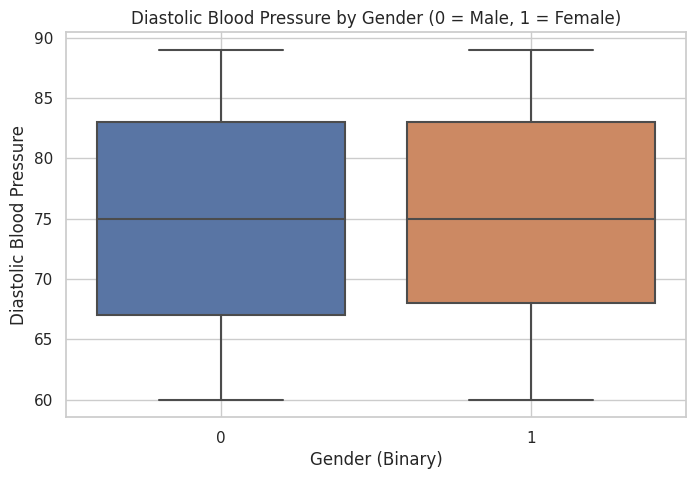

In [7]:
variables = [
    'Age', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
    'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate',
    'Exercise_Hours_per_Week', 'Alcohol_Consumption_per_Week',
    'Systolic_BP', 'Diastolic_BP'
]
titles = {
    'Age': 'Age',
    'Height_cm': 'Height (cm)',
    'Weight_kg': 'Weight (kg)',
    'BMI': 'Body Mass Index (BMI)',
    'Daily_Steps': 'Daily Steps',
    'Calories_Intake': 'Calories Intake',
    'Hours_of_Sleep': 'Hours of Sleep',
    'Heart_Rate': 'Heart Rate',
    'Exercise_Hours_per_Week': 'Exercise Hours/Week',
    'Alcohol_Consumption_per_Week': 'Alcohol Consumption/Week',
    'Systolic_BP': 'Systolic Blood Pressure',
    'Diastolic_BP': 'Diastolic Blood Pressure',
}
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Gender_bin', y=var, data=df)
    plt.title(f'{titles[var]} by Gender (0 = Male, 1 = Female)')
    plt.xlabel('Gender (Binary)')
    plt.ylabel(titles[var])
    plt.grid(True)
    plt.show()


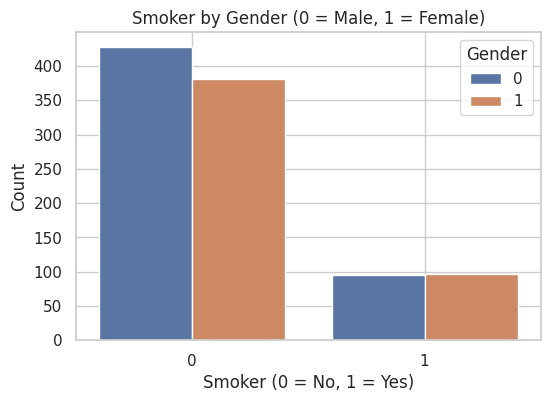

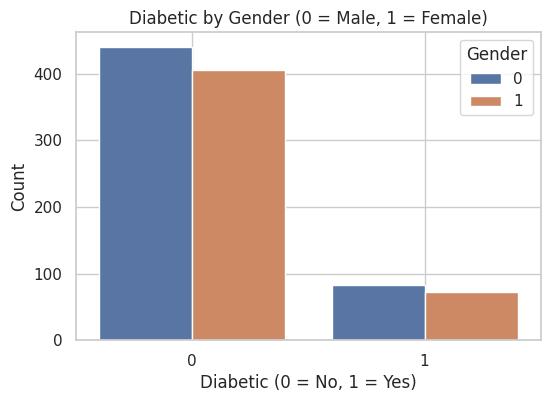

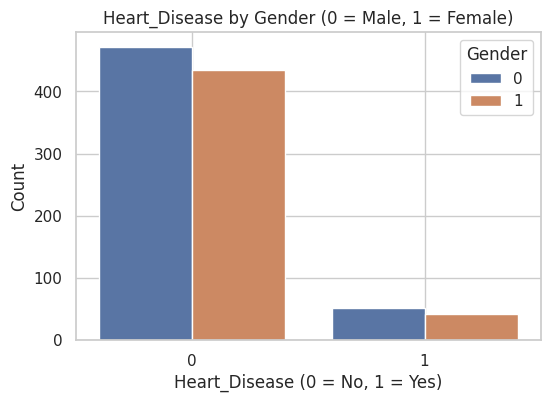

In [8]:
binary_vars = ['Smoker_bin', 'Diabetic_bin', 'Heart_Disease_bin']

for var in binary_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, hue='Gender_bin', data=df)
    plt.title(f'{var.replace("_bin", "")} by Gender (0 = Male, 1 = Female)')
    plt.xlabel(f'{var.replace("_bin", "")} (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.grid(True)
    plt.show()


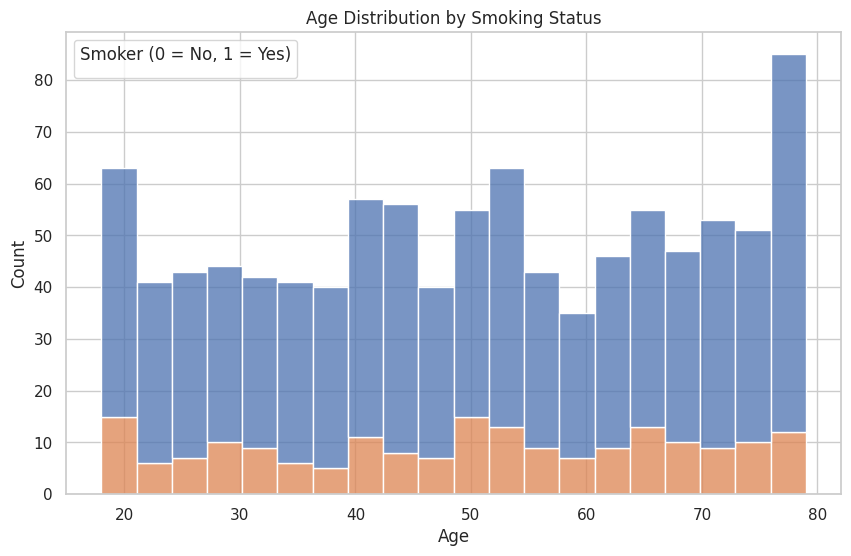

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Smoker_bin', multiple='stack', kde=False, bins=20)
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Smoker (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

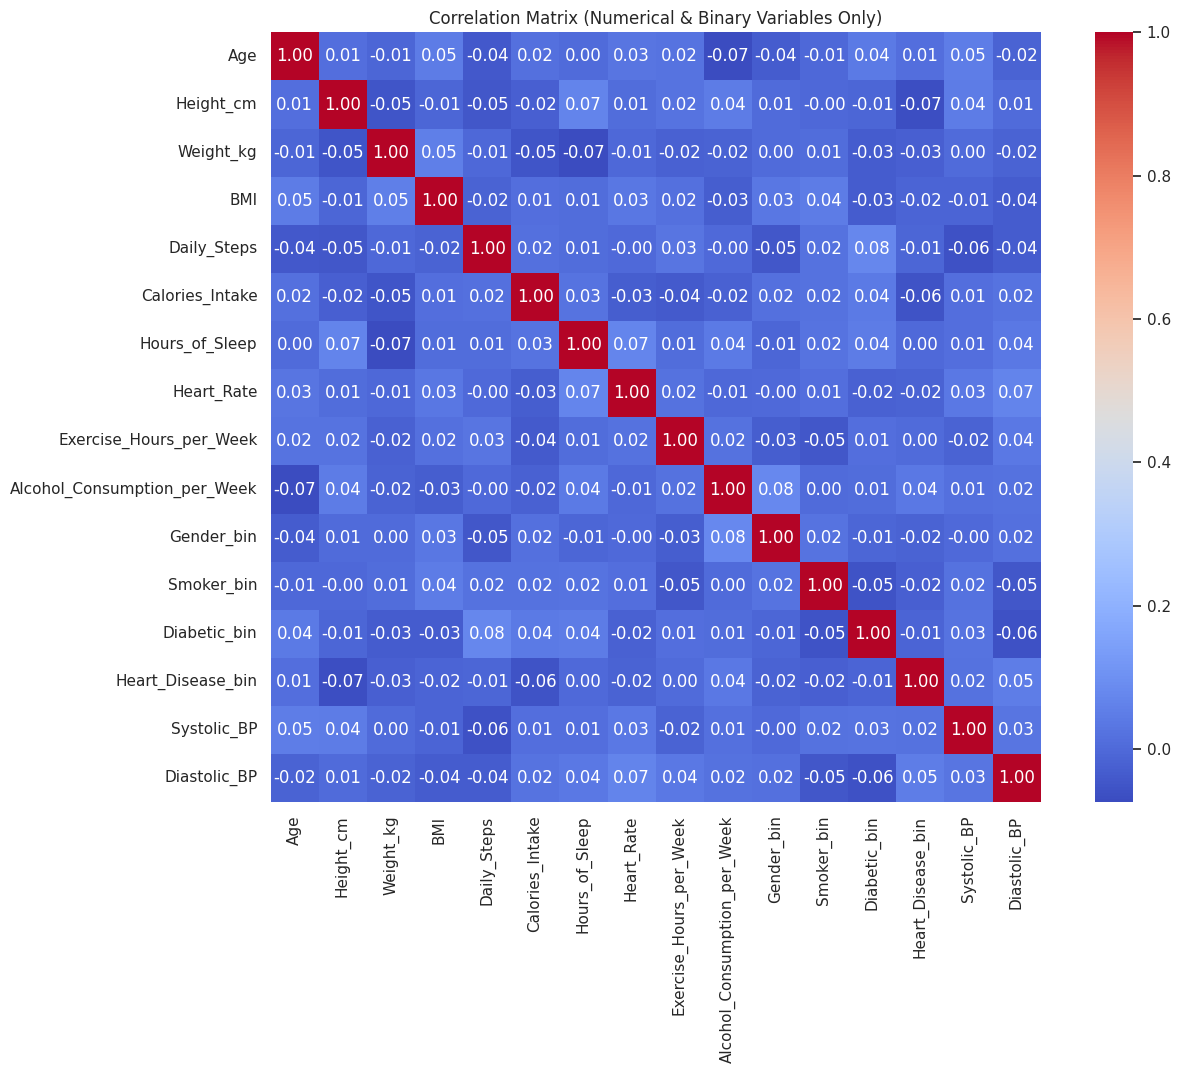

In [10]:
columns_to_exclude = [
    'ID', 'Gender', 'Smoker', 'Diabetic', 'Heart_Disease', 'Blood_Pressure'
]
numeric_df = df.drop(columns=columns_to_exclude)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numerical & Binary Variables Only)')
plt.show()


## 📈 Predictions and Variable Correlations

This section presents predictive modeling results for key health outcomes, along with an analysis of the variables that contribute most to each prediction.

- ✅ Three binary targets were defined for classification:
  - `Smoker_bin` (smoking status)
  - `Diabetic_bin` (presence of diabetes)
  - `Heart_Disease_bin` (presence of heart disease)
- 🔍 Each target was predicted using a consistent set of explanatory variables, including:
  - Demographic and lifestyle features: `Age`, `BMI`, `Daily_Steps`, `Height_cm`, `Calories_Intake`, etc.
  - Other binary health indicators (excluding the current target variable)
- 🤖 Seven machine learning models were applied:
  - `Logistic Regression`, `Random Forest`, `XGBoost`, `LightGBM`, `CatBoost`, `KNN`, and `Naive Bayes`
- 📊 Accuracy and computation time were recorded for each model-target combination
- 🧠 Feature importance scores were calculated where supported, in order to identify the most influential predictors:
- 📉 Visual representations were generated to display feature importance rankings per model and target


In [11]:
base_features = [
    'Age', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
    'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate',
    'Exercise_Hours_per_Week', 'Alcohol_Consumption_per_Week',
    'Gender_bin', 'Systolic_BP', 'Diastolic_BP'
]
binary_targets = ['Smoker_bin', 'Diabetic_bin', 'Heart_Disease_bin']
target_labels = {
    'Smoker_bin': 'Smoking',
    'Diabetic_bin': 'Diabetes',
    'Heart_Disease_bin': 'Heart Disease'
}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

results = []
feature_importances = {}

for target_col in binary_targets:
    target_name = target_labels[target_col]
    print(f"\n🎯 Target: {target_name}")
    other_bins = [col for col in binary_targets if col != target_col]
    features = base_features + other_bins
    X = df[features]
    y = df[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    for model_name, model in models.items():
        print(f"   ➤ Training model: {model_name}")
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        duration = round(time.time() - start_time, 2)
        print(f"     ✔ Accuracy: {round(acc * 100, 2)}%")
        print(f"     ⏱ Time: {duration} sec")
        results.append({
            'Target': target_name,
            'Model': model_name,
            'Accuracy (%)': round(acc * 100, 2)
        })

        try:
            if model_name in ['Random Forest', 'LightGBM', 'XGBoost']:
                importances = model.feature_importances_
            elif model_name == 'CatBoost':
                importances = model.get_feature_importance()
            elif model_name == 'Logistic Regression':
                importances = np.abs(model.coef_[0])
            else:
                continue  # Skip importance for Naive Bayes, KNN etc.

            feature_importances[(target_name, model_name)] = dict(zip(features, importances))
        except:
            pass 

results_df = pd.DataFrame(results)
display(results_df)



🎯 Target: Smoking
   ➤ Training model: Logistic Regression
     ✔ Accuracy: 78.5%
     ⏱ Time: 0.03 sec
   ➤ Training model: Random Forest
     ✔ Accuracy: 78.5%
     ⏱ Time: 0.29 sec
   ➤ Training model: XGBoost
     ✔ Accuracy: 74.0%
     ⏱ Time: 0.12 sec
   ➤ Training model: LightGBM
[LightGBM] [Info] Number of positive: 148, number of negative: 652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.185000 -> initscore=-1.482832
[LightGBM] [Info] Start training from score -1.482832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

,Target,Model,Accuracy (%)
0,Smoking,Logistic Regression,78.5
1,Smoking,Random Forest,78.5
2,Smoking,XGBoost,74.0
3,Smoking,LightGBM,77.5
4,Smoking,CatBoost,78.5
5,Smoking,KNN,75.0
6,Smoking,Naive Bayes,78.5
7,Diabetes,Logistic Regression,85.5
8,Diabetes,Random Forest,85.5
9,Diabetes,XGBoost,84.0


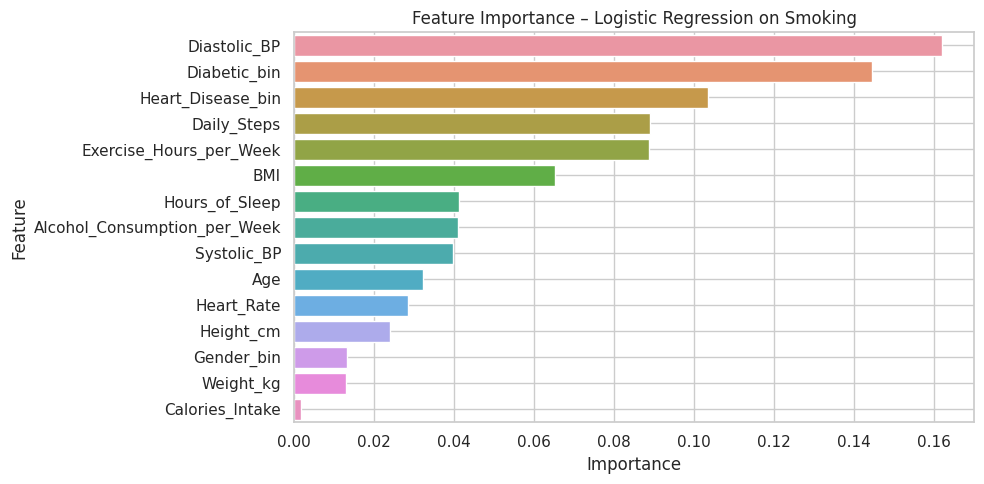

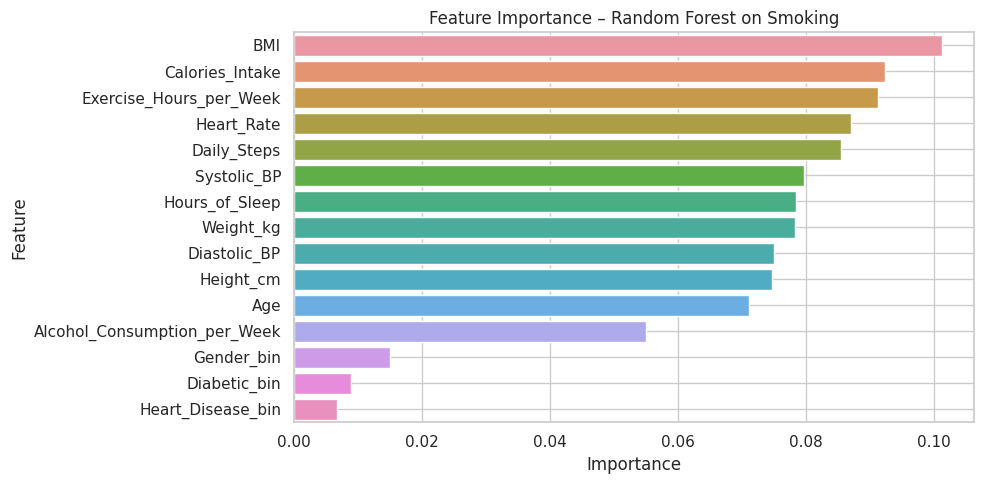

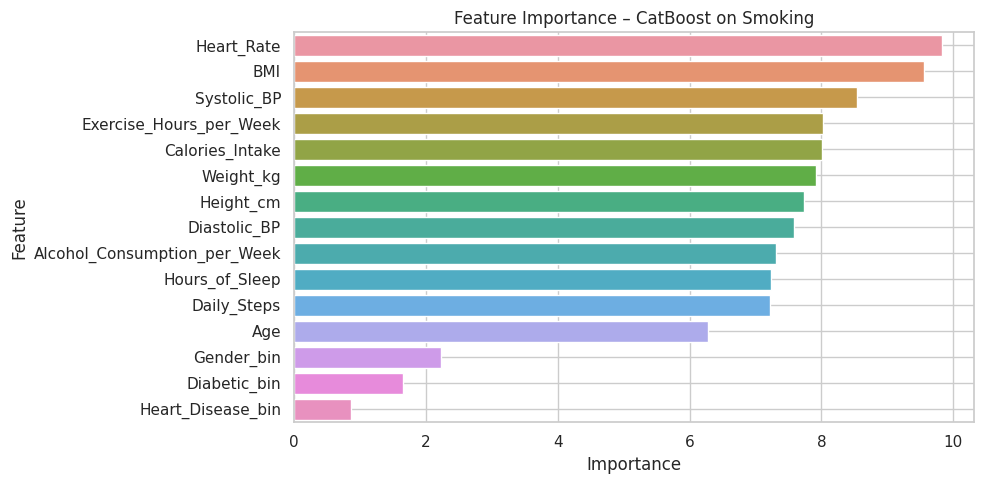

No feature importance found for Naive Bayes on Smoking


In [12]:
def plot_feature_importance(importances_dict, target, model):
    key = (target, model)
    if key not in importances_dict:
        print(f"No feature importance found for {model} on {target}")
        return
    
    importance = importances_dict[key]
    sorted_feat = dict(sorted(importance.items(), key=lambda x: x[1], reverse=True))

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(sorted_feat.values()), y=list(sorted_feat.keys()))
    plt.title(f'Feature Importance – {model} on {target}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.grid(True)
    plt.show()
plot_feature_importance(feature_importances, 'Smoking', 'Logistic Regression')
plot_feature_importance(feature_importances, 'Smoking', 'Random Forest')
plot_feature_importance(feature_importances, 'Smoking', 'CatBoost')
plot_feature_importance(feature_importances, 'Smoking', 'Naive Bayes')



In [13]:
#plot_feature_importance(feature_importances, 'Diabetes', 'Logistic Regression')
#plot_feature_importance(feature_importances, 'Diabetes', 'Random Forest')
#plot_feature_importance(feature_importances, 'Diabetes', 'CatBoost')
#plot_feature_importance(feature_importances, 'Diabetes', 'Naive Bayes')

In [14]:
#plot_feature_importance(feature_importances, 'Heart Disease', 'Logistic Regression')
#plot_feature_importance(feature_importances, 'Heart Disease', 'Random Forest')
#plot_feature_importance(feature_importances, 'Heart Disease', 'CatBoost')
#plot_feature_importance(feature_importances, 'Heart Disease', 'Naive Bayes')